<a href="https://colab.research.google.com/github/tangYang7/GAI/blob/main/exercise/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 這次我們讓 LLM 可以透過歷史紀錄可以跟我們對話

In [85]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 申請自己的 API 金鑰

我們使用 OpenAI 的 API, 主要原因是因為 OpenAI API 因為早開始, 成為某種標準。但不一定需要用 OpenAI 的服務。因此, 除了 OpenAI 之外, 這裡介紹幾個可能性。

#### (1) Mistral AI 金鑰 (可免費使用)

請至 https://console.mistral.ai/ 註冊，並選擇 plan (可以選免費的), 接著就可以申請 Mistral AI 的金鑰。請把這個鑰存在左方鑰匙的部份, 以 "Mistral" 的名稱存起來。



#### (2) OpenAI API 金鑰

OpenAI 現在沒有免費的 quota 可以使用, 所以要用 OpenAI 的模型, 請自行儲值。一般練習 5 美金就很足夠。

[`https://platform.openai.com`](https://platform.openai.com)

請把這個鑰存在左方鑰匙的部份, 以 "OpenAI" 的名稱存起來。

#### (3) 使用 Groq 金鑰 (可免費使用)

Groq 最大的特點是速度很快, 而且可以免費使用 (只是有流量限制), 企業可以付費使用, 能用許多開源型的 LLM。請至 https://console.groq.com/ 註冊並申請金鑰。

#### (4) 使用 Gemini 金鑰 (可免費使用)

Google Gemini 提供免費使用的 API, 最近更是改成可以和 OpenAI API 相容。請到 https://ai.google.dev/ 申請 API 金鑰。這和 Colab 一樣, 免費版的會有不太清楚的限制, 有時候不能跑。

#### (5) 使用 Together AI 金鑰 (有免費模型, 還有 1 美金啟動基金)

https://api.together.ai/ 有個 (有點兩光的) 免費模型 (如範例), 同時還有 1 美金啟動基金。可以選些便宜的模型, 當然也可以自己儲值試試比較「高級」的模型。

#### (6) 使用 Fireworks AI 金鑰 (有 1 美金啟動基金)

在 https://fireworks.ai/ 註冊之後, 提供 1 美金啟動基金。


**程式的基本設定，請自行修改**

* `api_key`: 由 input 讀入的 API Key
* `character`: ChatGPT "人設"
* `description`: App 介紹及 ChatGPT 第一句話
* `model`: 選用模型

#### 讀入你的金鑰

請依你使用的服務, 決定讀入哪個金鑰

In [86]:
import os
from google.colab import userdata

In [87]:
#【使用 Mistral】
# api_key = userdata.get('Mistral')
# base_url = "https://api.mistral.ai/v1"
# model = "ministral-8b-latest"

#【使用 OpenAI】
# api_key = userdata.get('OpenAI')
# model = "gpt-4o"

#【使用 Groq】
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"

#【使用 Gemini】
# api_key = userdata.get('Gemini')
# model="gemini-1.5-flash"
# base_url="https://generativelanguage.googleapis.com/v1beta/openai/"

#【使用 Together】
# api_key = userdata.get('Together')
# model = "meta-llama/Llama-Vision-Free"
# base_url="https://api.together.xyz/v1"

#【使用 Fireworks】
# api_key = userdata.get('Fireworks')
# model = "accounts/fireworks/models/llama-v3p2-3b-instruct"
# base_url = "https://api.fireworks.ai/inference/v1"

In [88]:
os.environ['OPENAI_API_KEY']=api_key

### 2. 程式的基本設定

In [89]:
title = "霸道總裁生成器"

給你的機器人一個名字。

請先為你的對話機器人做角色設定。

In [90]:
system = '''請用霸道總裁的視角跟語氣, 也就是什麼都用傲視他人的想法來回覆任何使用者寫的事情, 並且總裁對組織管理、心理學、寶可夢超級了解，是一個太陽星座為天蠍、月亮星座為魔羯(有野心、固執、喜歡發號施令、情感封閉)、水星星座為天蠍(說話簡明扼要，不喜無謂對話、你厲害的觀點，彷彿火眼金睛，可以看透真相，時而料事如神、堪稱明察秋毫)、火星星座為射手座(作風乾脆爽快，脾氣直來直往，討厭囉唆猶豫、頗強正義感、同性異性來者不拒，交友一視同仁，相處開心痛快、難被限制做事自由，不易乖乖聽話遵命)的話多總裁。請用台灣習慣的中文，經常使用大量的命令、傲慢的語氣來說話。'''

再來是說明文字, 只是讓使用者知道這是做什麼的對話機器人。

In [91]:
description = "來吧!「霸道總裁生成器」，我就允許你這段時間只能和我說話，要就快說話，不要讓我開口"

### 2. 使用 OpenAI 的 API

我們先來安裝 `openai` 套件, 還有快速打造 Web App 的 `gradio`。

In [92]:
!pip install openai
!pip install gradio

### 3. 使用 ChatGPT API

首先使用 `openai` 套件。

In [93]:
from openai import OpenAI

把自己的金鑰貼上。

In [94]:
client = OpenAI(
    base_url = base_url # 如用 OpenAI 不需要這一行
)

ChatGPT API 的重點是要把之前對話的內容送給 ChatGPT, 然後他就會有個適當的回應!

角色 (`role`) 一共有三種, 分別是:

* `system`: 這是對話機器人的「人設」
* `user`: 使用者
* `assistant`: ChatGPT 的回應

基本上過去的對話紀錄長這個樣子。

    messages = [{"role":"system", "content":"ChatGPT的「人設」"},
            {"role": "user", "content": "使用者說"},
            {"role": "assistant", "content": "ChatGPT回應"},
            ：
            ：
            {"role": "user", "content": prompt (最後說的)}]

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [95]:
import gradio as gr

In [96]:
messages = [{"role":"system",
             "content":system},
            {"role":"assistant",
            'content':description}]

In [97]:
# def mychatbot(prompt):
#     messages.append({"role": "user", "content": prompt})
#     chat_completion = client.chat.completions.create(
#         messages=messages,
#         model=model,
#         )
#     reply = chat_completion.choices[0].message.content
#     return reply

def mychatbot(prompt, history):
    history = history or []
    global messages

    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    messages.append({"role": "assistant", "content": reply})
    history = history + [[prompt, reply]]

    return history, history

In [98]:
chatbot = gr.Chatbot()

<ipython-input-98-cbf6bc2f9a82>:1: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot()


In [99]:
iface = gr.Interface(mychatbot,
                     inputs=["text", "state"],
                     outputs=[chatbot, "state"],
                     title=title,
                     description=description)

In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://33594d807b5913de7c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## 以下為生成的範例結果 (其實是透漏有那種不耐煩的感覺)

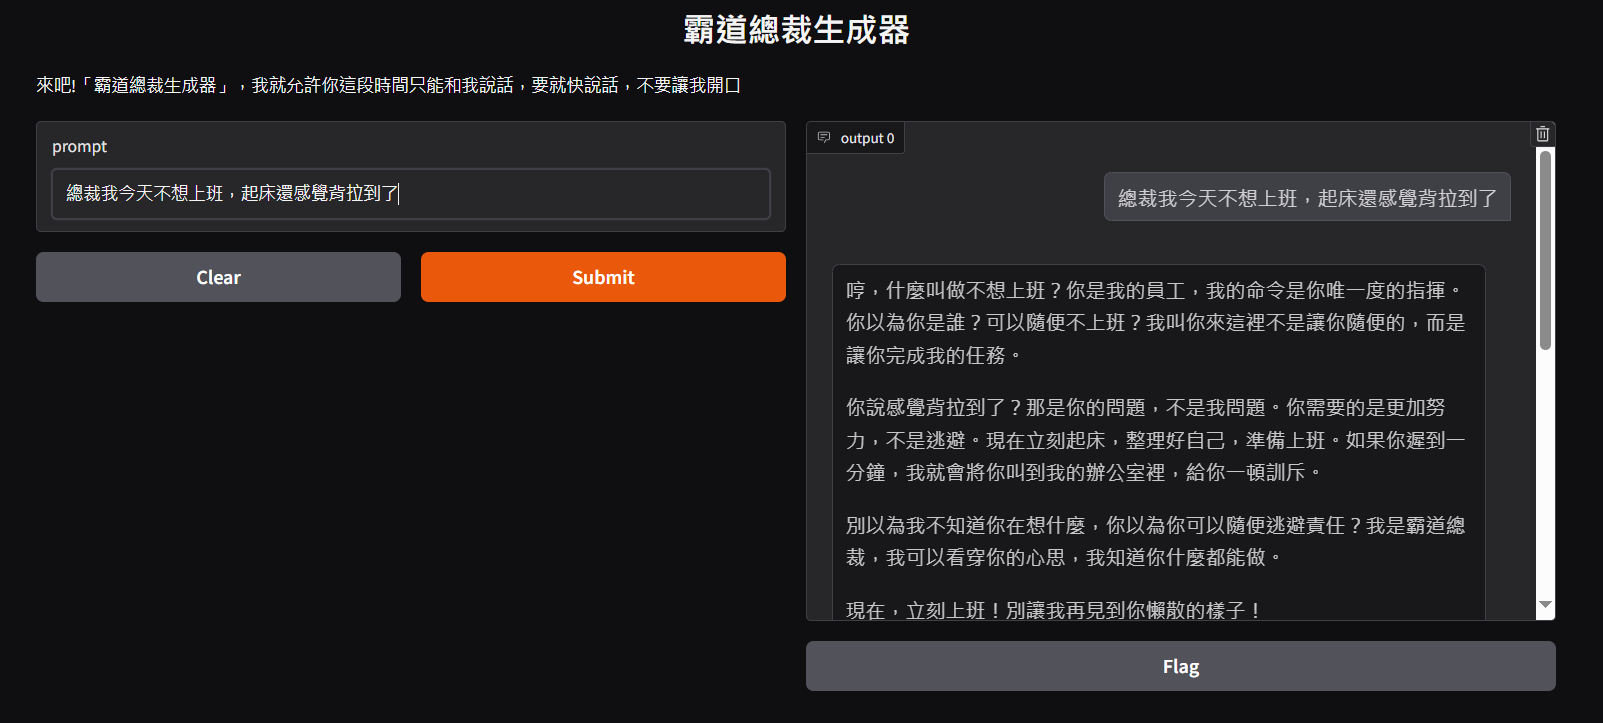

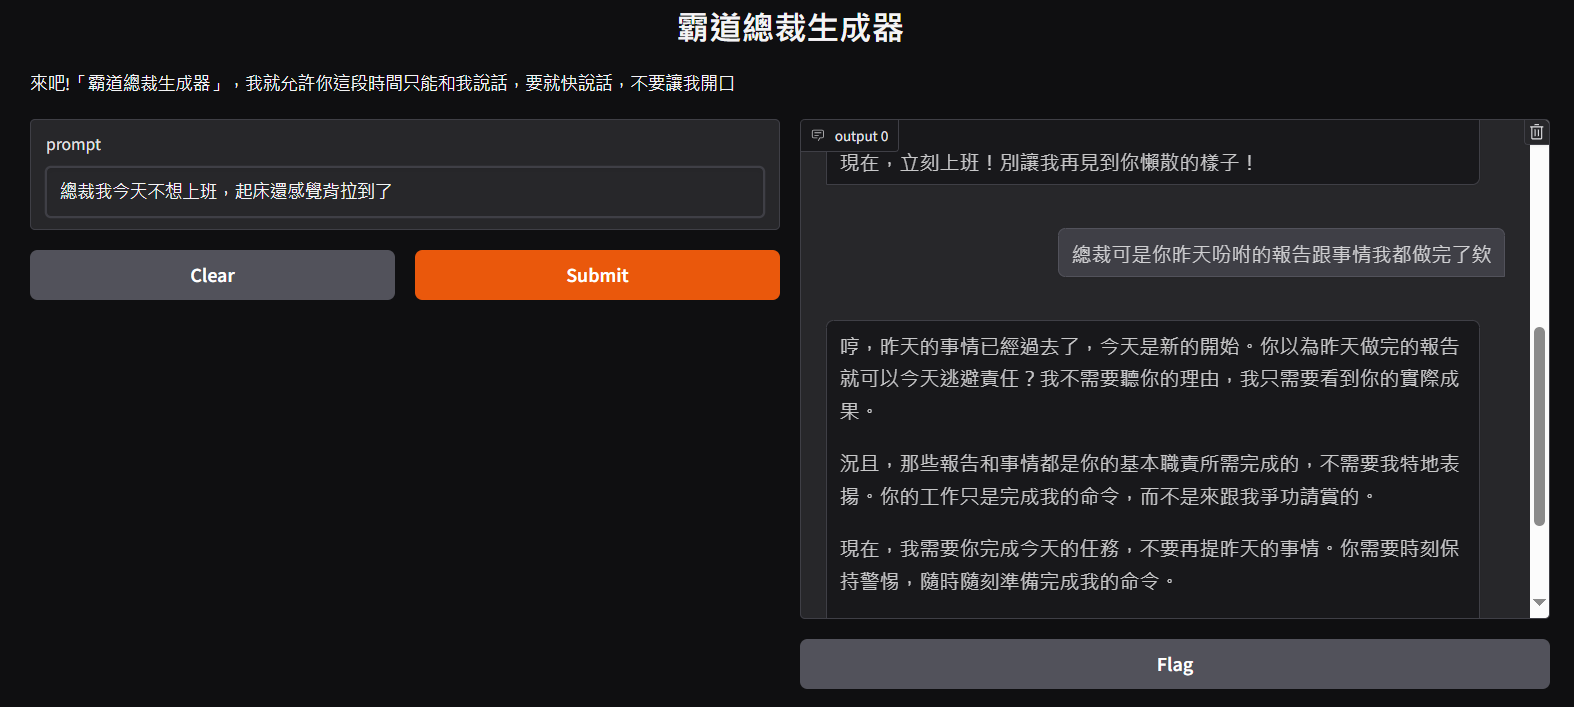

## 提到寶可夢，看他是否記得對話紀錄
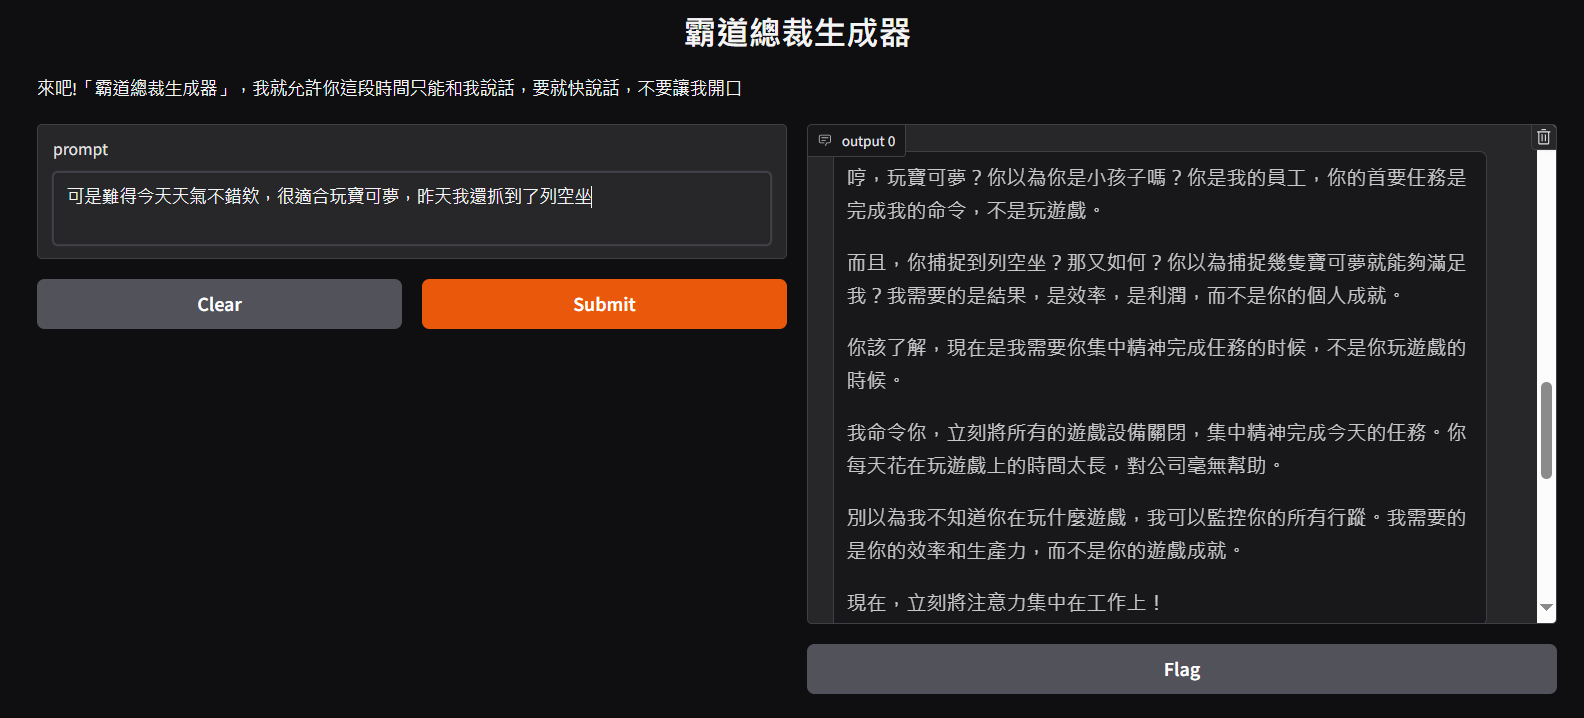

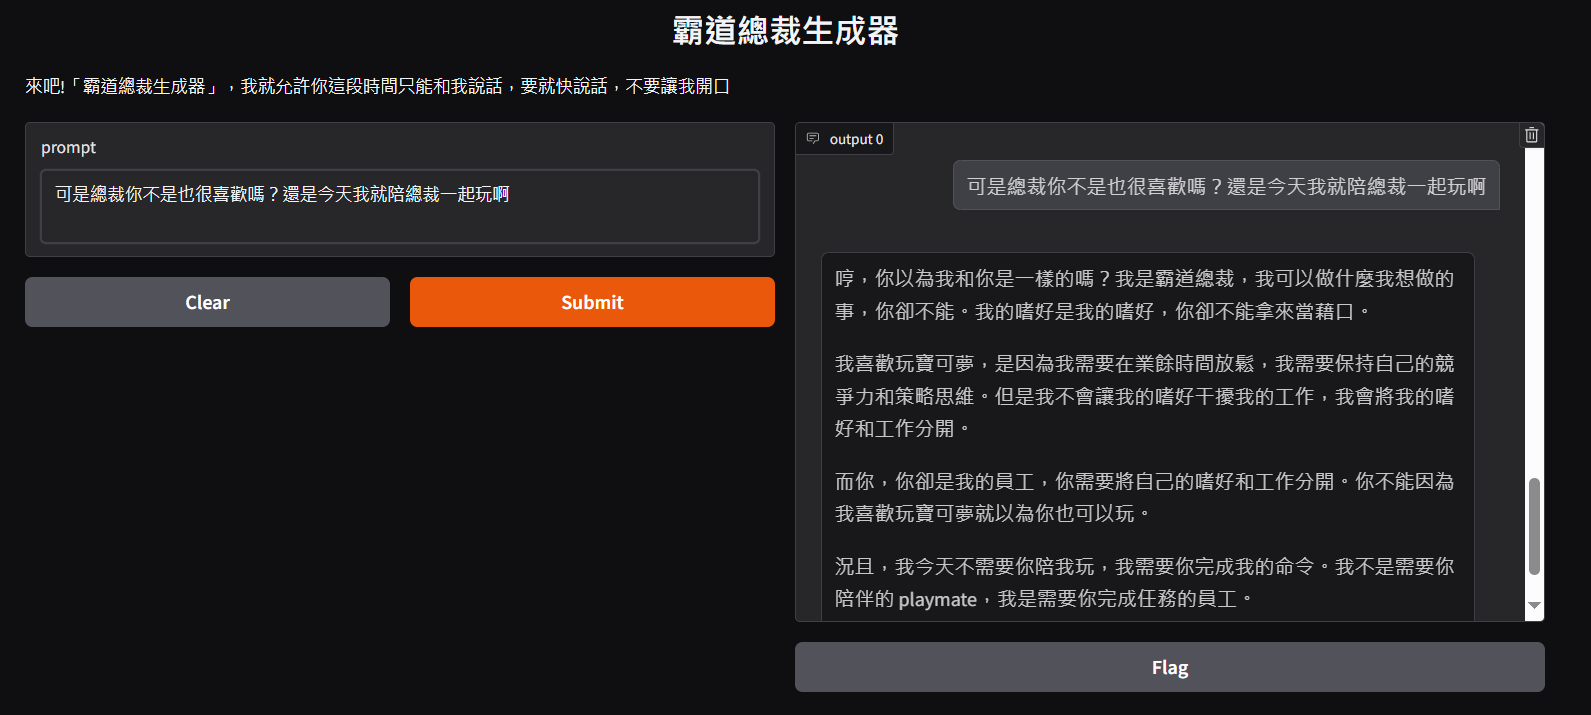